<a href="https://colab.research.google.com/github/Hebaehab765/AI4GoodLab/blob/main/MLF_Unsupervised_Learning_Heba's_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Foundations - **Unsupervised Learning**

In this notebook we explore an example of an unsupervised learning algorithm called **K-Means Clustering**.

You can use this notebook in two ways:


1.   Download the notebook and run it locally on your computer (*File -> Download -> Download .ipynb*). This requires setup.
2.   Access and run in **Google Colab**. [*recommended*]
  * To save your changes to the notebook, you can save a copy to your Google Drive (*File -> Save a copy in Drive*).

To run each block of code, click the ▶ button on the top left corner of the cell.


If you are not familiar with coding and Python, here are a few different types of notations you will encounter in the code blocks.


*   Lines starting with # are *comment lines* and are not executed when running the code. They are used to add additional context, section the code or for testing purposes.

  ```python
   ################################
   # This an example of a comment #
   ################################
   ```


*   Lines in the following format are used to import pre-written Python code libraries, called *packages*. Once they are imported, they can be used in our code.

  ```python
  import <package_name>
  import <package_name> as <alias>
  from <package_name> import <object_name>

  ```
* Lines starting with % are *magic commands* exclusive to Ipython/Jupyter or Colab and help customize the notebook or interact with it.

  ```ipython
  %matplotlib inline

  ```

Other lines of code can perform a variety of actions such as store information, initialize ML models, perform training, visualization, and so forth.  You do not need to understand all lines individually. Try to follow the overall high-level process by paying attention to explanations and comments.

# Setup and Initialization

First we will take look at how the data for unsupervised machine learning can look like.

The below cell does the following

1.   Loads required libraries
2.   Loads and prepares the data
3. Displays our data in a dataframe



## Iris flower dataset

For this unsupervised learning example, we will be using a classsic data science dataset, **Iris flower dataset** which can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/datasets).
The dataset includes information such as petal and sepal length/width for 150 Iris flowers.


In [ ]:
# sklearn represents scikit-learn, a popular ML package for Python. (https://scikit-learn.org)
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt # matplotlib is a visualization tool
import matplotlib.colors as mcolors
from IPython.display import display
import pandas as pd
import numpy as np
import time

%matplotlib inline

iris_data = load_iris()   # loads iris dataset from sklearn.datasets

X = iris_data.data

iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) # creating a dataframe
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In the above dataframe, we can see all the dimensions for the flowers (sepal and petal sizes). Below, we have highlighted the dataframe to enforce the fact that it contains only features (X) and no target/label variable (Y).


*   Green highlight = Features
*   Red highlight = Labels (in our case there is no red)






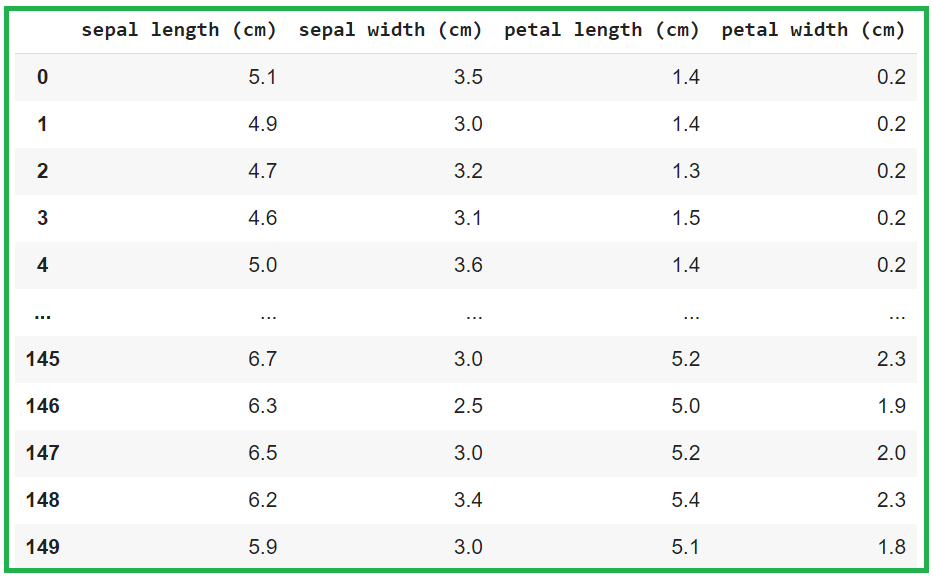

From here onwards, we will use an algorithm called **K-Means Clustering**. The goal of this algorithm is to find groups/clusters in the data, with the number of groups represented by the variable **K**.




# K-means Clustering

Simply put, the algorithm can be broken down into a few steps that are performed for many iterations.


1.   **K** initial points are chosen as cluster centroids (can be done randomly from the dataset)
2.   Assign each data point to the closest centroid
3.   Update each centroid to be the mean of all the data points assigned to it
4.   Go to step #2.



# How should we determine the best *K* for this dataset?

Before we answer this question, let's try out a few different values for K and look at the resulting groups.

Use the slider to change the value of K before running the cell.

Since the data has 4 different features, we need to select two of them to visualize the data in 2D space. Use the drop-down lists to choose your desired x and y axes.

In the following cell the K-Means algorithm is set up using the following line.

  ```python
    kmeans = KMeans(n_clusters=K, n_init='auto')
  ```
The next line computes the cluster centers (centroids) and predicts assign each sample to a cluster. We can say we "fit" the algorithm to the data.

  ```python
    y_kmeans = kmeans.fit_predict(X)
  ```

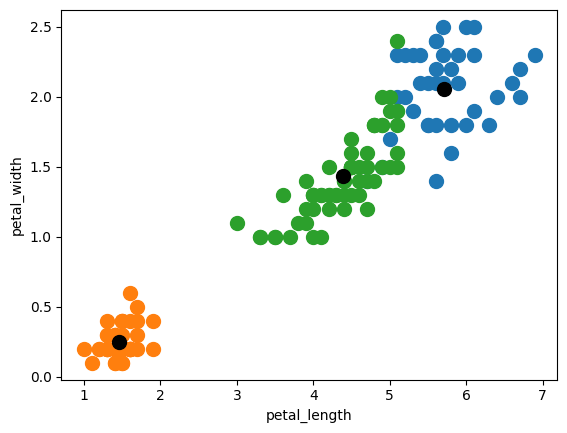

In [ ]:
################### Notebook menu setup ###################
# Please ignore this section.
# The following section sets up the menus on the right.
# @title Let's cluster with different K values!
# @markdown Use the slider to change the number of clusters

K = 4 # @param {type:"slider", min:1, max:9, step:1}
# @markdown Use the slider to change the number of clusters
x_axis = "petal_length"  # @param ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y_axis = "petal_width"  # @param ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

feature_to_index = {
    'sepal_length': 0,
    'sepal_width': 1,
    'petal_length': 2,
    'petal_width': 3
}

##################### K-MEANS CLUSTERING ######################
# setup K-means parameter (choose K)
kmeans = KMeans(n_clusters=K, n_init='auto')
y_kmeans = kmeans.fit_predict(X) # perform clustering on the data (X)

######################## Visualization ########################
colors = list(mcolors.TABLEAU_COLORS.keys())
for i in range(K):
  plt.scatter(X[y_kmeans   == i, feature_to_index[x_axis]], X[y_kmeans == i, feature_to_index[y_axis]],s = 100, c = colors[i], label = 'Iris - Group 1')
plt.scatter(kmeans.cluster_centers_[:, feature_to_index[x_axis]], kmeans.cluster_centers_[:, feature_to_index[y_axis]],s = 100, c = 'black', label = 'Centroids')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()
plt.close()

To find the optimal **K** for this dataset, we perform clustering for a range of K values and look at an evaluation metric called **Inertia** for each run.
**Inertia** is a measure of data points' distance to their respective cluster. This means we like clusterings with lower inertia.

In [ ]:
sum_of_squared_distances = [] # list of all results

# The following block is repeated for different values of k
for k in range(1,15): # k = 1, 2, 3, ..., 14
    # perform clustering with k clusters
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_) # store inertia for this run

We will now plot our experiment's results to decide what is the optimal number of groups in Iris flowers. We will use a method called the "Elbow Method" to help us determine the optimal K.

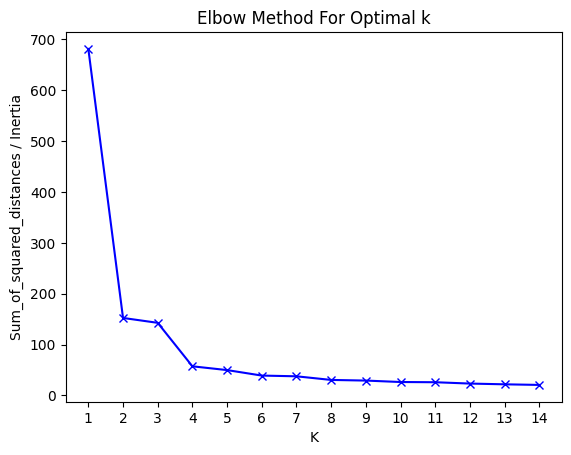

In [ ]:
# plot the results
plt.plot(range(1,15), sum_of_squared_distances, 'bx-')
plt.xticks(range(1,15))
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances / Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Elbow Method

The elbow method tells us the optimal K (number of groups/clusters) by looking at the graph of clustering inertia for each K. We need to find the point at which the shape of the graph bends like an elbow and continues onwards as the hand. For example:

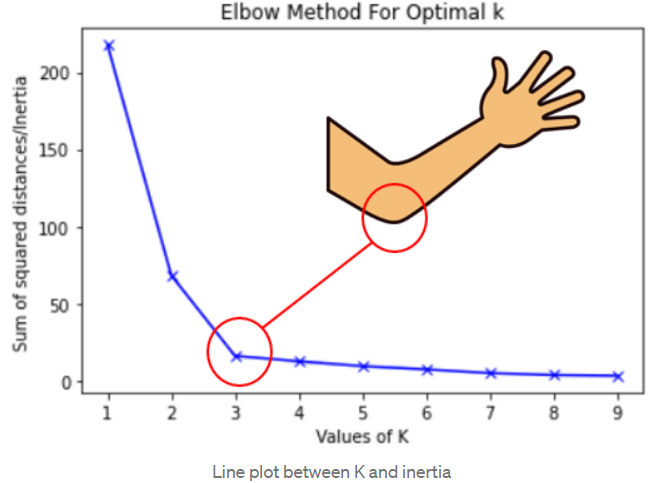

# Visualizing the Algorithm

Therefore we will proceed with clustering into 3 groups (K=3). Now, let's look more closely at how the algorithm works, step-by-step!
Like many ML algorithms, K-Means is performed through many iterations. The next cell, shows the clusters at each iteration of the algorithm. It also plots "inertia". Pay attention to how the clusters change and the inertia decreases as the algorithm progresses.

*Note that there are many different ways of choosing the initial cluster centers (centroids). The ones we used in the following code are not the best starting points but were chosen to provide a better visualization of the algorithm. Ideally, we would let the algorithm choose the centroids automatically.*

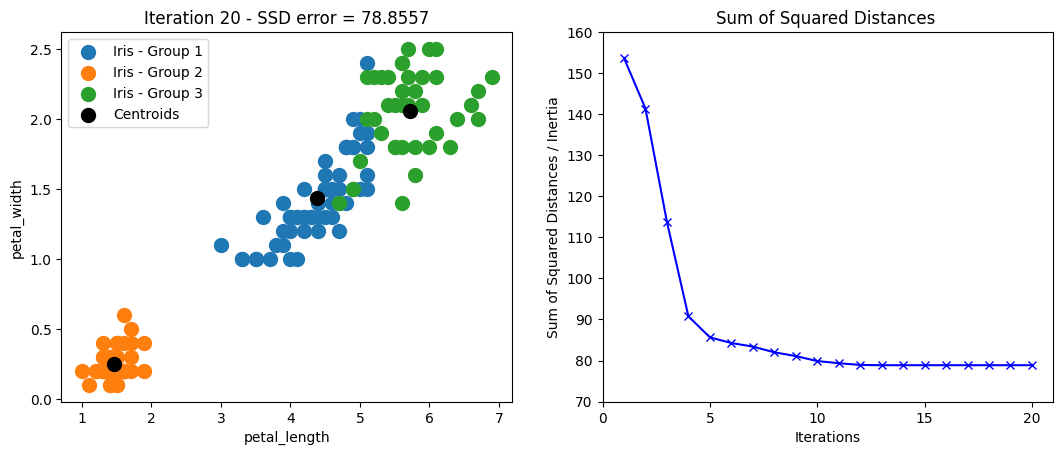

In [ ]:
################ Notebook menu setup ################
# @title Perform clustering for 20 iterations.
# @markdown Choose two features for visualization:
x_axis = "petal_length"  # @param ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y_axis = "petal_width"  # @param ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


################ Initial Centroids ################
# First we choose our clusters' initial starting points - CENTROIDS
# You can do this randomly or pick specific points.
# Here are some options. You can uncomment your choice.

# - RANDOM CENTROIDS
# np.random.seed(1) # this line makes the random numbers recreatable for experimental purposes
# nums = np.random.choice(len(X), size = 3, replace = False)
# centroids =  [X[i] for i in nums] #np.random.choice(len(X), size = 3, replace = False)]

# - SET 1
centroids = [X[10], X[13], X[109]]

hdisplay = display("", display_id=True)

sum_of_squared_distances = [] # This is a measure of distance from the ground truth for each iteration
N = 20 # number of iterations
for i in range(N): # This line makes the following code block loop 20 times
  kmeans = KMeans(n_clusters=3, init = centroids, max_iter = 1, random_state = 0, n_init = 1) # initialization
  y_kmeans = kmeans.fit_predict(X) # perform clustering

  sum_of_squared_distances.append(kmeans.inertia_)
  centroids = kmeans.cluster_centers_ # replace old centroids with new ones

  # The following code is for plotting
  fig, ax = plt.subplots(1, 2, figsize=(12.8, 4.8))
  # colors = ['red', 'blue', 'green']

  # Scatter plot
  ax[0].set_title(f'Iteration {i+1:2d} - SSD error = {kmeans.inertia_:.4f}')
  for j in range(3):
    ax[0].scatter(X[y_kmeans   == j, feature_to_index[x_axis]], X[y_kmeans == j, feature_to_index[y_axis]],s = 100, c = colors[j], label = f'Iris - Group {j+1}')
  ax[0].scatter(centroids[:, feature_to_index[x_axis]], centroids[:, feature_to_index[y_axis]],s = 100, c = 'black', label = 'Centroids')
  ax[0].legend()
  ax[0].set_xlabel(x_axis)
  ax[0].set_ylabel(y_axis)

  # Sum of Squared Distances plot
  ax[1].set_title('Sum of Squared Distances ')
  ax[1].set_xlim(0, N+1)
  ax[1].set_ylim(70, 160)
  ax[1].xaxis.set_major_locator(plt.MultipleLocator(5))
  ax[1].set_xlabel('Iterations')
  ax[1].set_ylabel('Sum of Squared Distances / Inertia')
  ax[1].plot(range(1, (i+1)+1), sum_of_squared_distances, 'bx-')

  time.sleep(1)
  hdisplay.update(fig)
  plt.close()


# Results vs Reality

In fact, we know that there are 3 different species of Iris flowers in nature, namely:

1.   Versicolor
2.   Virginica
3.   Setosa

This validates the our findings and our choice of **K**.


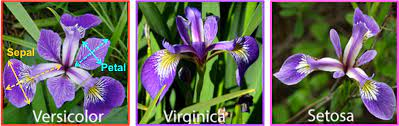

Even though we did not use label information for our unsupervised experiment the label data actually exists.
We can now compare our clustering results with the ground truth.

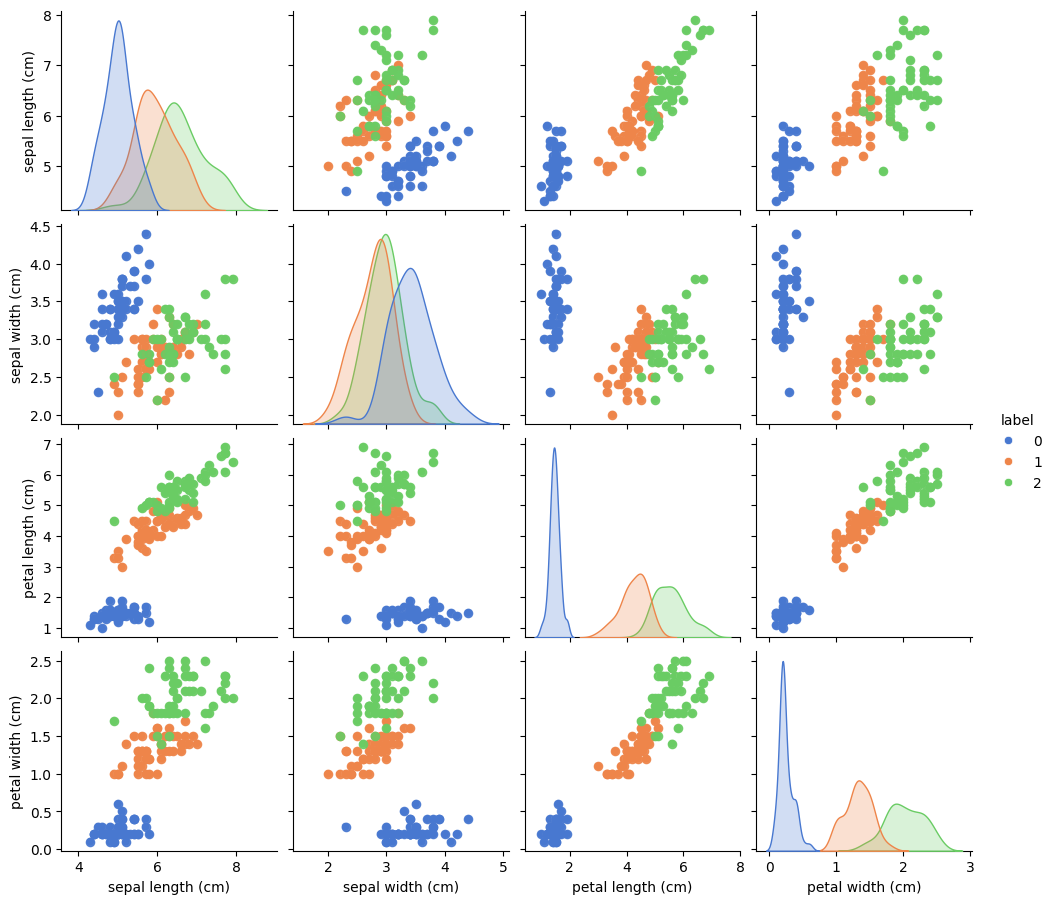

In [ ]:
import seaborn as sns

iris_df['label'] = iris_data.target # adding label to the data

# Visualization
a = sns.pairplot(iris_df,hue='label',palette="muted",vars=['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)'])
a = a.map_offdiag(plt.scatter,s=35,alpha=0.9)
sns.despine()
plt.subplots_adjust(top=0.9)

## Some things to think about ...

* If you don't have labels to verify if the cluster are correct, what can you do?
* Is there a way to visualize the clusters by taking all features into account, instead of only two?
* What if the data has a lot more features? How do you even visualize it?
* Take a look at the petal width vs. petal length plot. How do the results of using unsupervised learning compare to the true plot?
